Oriya Villarreal

Homework 3

20 October 2022

**Problem 1: Type II Testing**

Part A

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [41]:
# Step 1: Filepath and filename for Sauk River dataset  
sauk_data_file = 'Sauk_peak_WY1929_2021.xlsx'

sauk_data = pd.read_excel(sauk_data_file)

/opt/conda/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [42]:
# Divide the data into the early period and late period
sauk_before = sauk_data[ sauk_data['water year'] < 1977 ] 
sauk_after = sauk_data[ sauk_data['water year'] >= 1977 ] 

---
### Calculate Type II error and Power
For Type II error, $\beta$, is the probability that we would fail to reject a false null hypothesis.

Type II error is a function of both $\alpha$ (expressed in the equation below with $z_{\alpha}$), and the posited true nature of the probability distribution we are hoping to detect (Source: Lab 2-2)  


${ \beta = P\big((\overline{X}-\overline{Y}) < \Delta_0 + z_{\alpha}\sigma'\big)}$

where $\sigma'$ is the pooled standard deviation from $\overline{X}$ (the later period) and $\overline{Y}$ (the earlier period):

$\sigma' = \displaystyle\sqrt{ \displaystyle\frac{s^2_X}{n_X} + \displaystyle\frac{s^2_Y}{n_Y} }$


Power, $(1-\beta)$, is the probability that we would correctly conclude that a change in the probability distribution had taken place, given a certain assumed magnitude change had occurred. (Source: Lab 3-2) 

If we assume a true normal distribution with mean $(\overline{X}-\overline{Y}) = \Delta^* = 0.3\cdot\overline{Y}$ 

and a true standard deviation $\sigma^* = 1.1\cdot\sigma'$

then we need to solve for the intersection of $ \Delta^* + z_{eff}\sigma^* = \Delta_0 + z_{\alpha}\sigma'$

In [43]:
# Find the length of our two datasets
nX = len(sauk_after)
nY = len(sauk_before)

# Set our alpha and confidence
alpha = 0.05
conf = 1 - alpha

# Calculate z_alpha from a normal distribution
z_alpha = stats.norm.ppf(conf)

# Get our means
meanX = sauk_after['peak value (cfs)'].mean()
meanY = sauk_before['peak value (cfs)'].mean()

# Get our standard deviations
sdX = sauk_after['peak value (cfs)'].std(ddof=1)
sdY = sauk_before['peak value (cfs)'].std(ddof=1)

# Calculate the pooled standard deivation
sigma_prime = np.sqrt(sdX**2/nX + sdY**2/nY)

# For our null hypothesis PDF
delta_0 = 0

# Set our expected change in the mean (25% of early period mean)
delta_star = .25 * meanY

# Set our expected change in the standard deviation (1.3 times the pooled standard deviation)
sigma_star = 1.3 * sigma_prime

# Rearranging the equation above to solve for the "z effective" value, the z value on our postulated "true" PDF
z_eff = ((delta_0 + z_alpha*sigma_prime) - delta_star) / sigma_star

# Look up the cdf value of the postulated true distribution at this point to get our beta vlaue
beta = stats.norm.cdf(z_eff)
print("Type II error: {}".format(np.round(beta,4)))

# Display confidence that we are not commiting Type II error is
power = 1 - beta
print("Power: {}".format(np.round(power,4)))

Type II error: 0.3954
Power: 0.6046


Compute the two-sample z-test value:

$ztest = \displaystyle\frac{(\bar{X}-\bar{Y})-\Delta_0}{\sigma'}$

In [44]:
z_test = ((meanX - meanY) - delta_0) / sigma_prime
print("z-test = {}".format(np.round(z_test,2)))

p = 1 - stats.norm.cdf(z_test)
print("p = {}".format(np.round(p,4)))

z-test = 2.59
p = 0.0049


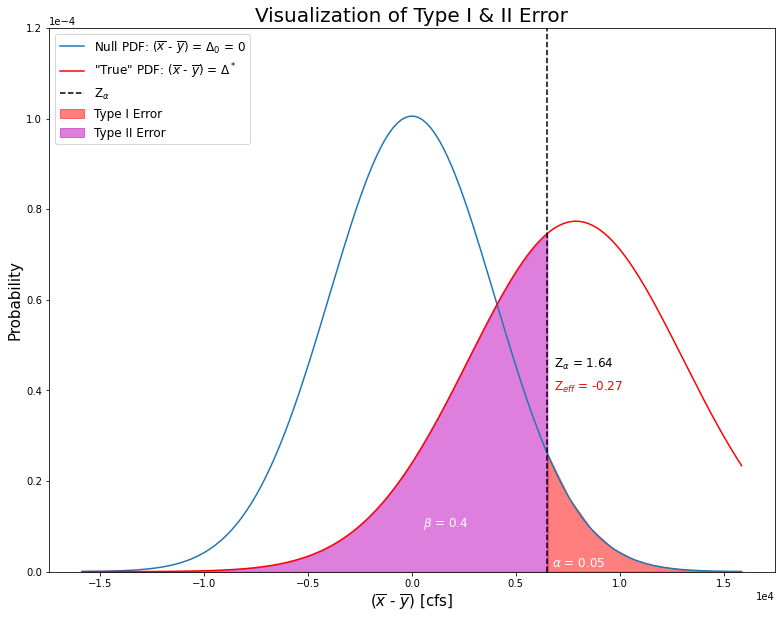

In [45]:
# Make a plot of Type I & II
plt.figure(figsize=(13,10))

# Create values for z
z = np.linspace(-4, 4, num=160) * sigma_prime
    
# Plot the Null PDF
plt.plot(z, stats.norm.pdf(z, delta_0, sigma_prime), label='Null PDF: ($\overline{x}$ - $\overline{y}$) = $\Delta_0$ = 0')

## Plot the postulated True PDF
plt.plot(z, stats.norm.pdf(z, delta_star, sigma_star), color='red', label=r'"True" PDF: ($\overline{x}$ - $\overline{y}$) = $\Delta^*$')

# Plot where z_alpha is
plt.axvline(z_alpha*sigma_prime, color='black', linestyle='--', label=r'Z$_\alpha$')
# Add labels here with z_alpha and z_eff values
plt.text(z_alpha*sigma_prime+300, 4e-5, r'Z$_{eff}$ = ' + str(round(z_eff,2)),fontsize=12, color='r')
plt.text(z_alpha*sigma_prime+300, 4.5e-5, r'Z$_{\alpha}$ = ' + str(round(z_alpha,2)),fontsize=12, color='k')

# Plot where z_test is
#plt.axvline(z_test*sigma_prime, color='k', linestyle=':', label=r'z-test')
# Add labels here with z_test
#plt.text(z_test*sigma_prime+300, 1e-5, r'z-test = ' + str(round(z_test,2)),fontsize=12, color='k')

# Shade in the Type I Error area
shade = np.linspace(z_alpha*sigma_prime, np.max(z), 10)
plt.fill_between(shade, stats.norm.pdf(shade, delta_0, sigma_prime) ,  color='red', alpha=0.5, label='Type I Error')
# Add label here with alpha value
plt.text(z_alpha*sigma_prime+200, 0.1e-5, r'$\alpha$ = ' + str(round(alpha,2)),fontsize=12, color='w')

# Shade in the Type II Error area
shade = np.linspace(np.min(z),z_alpha*sigma_prime, 30)
plt.fill_between(shade, stats.norm.pdf(shade, delta_star, sigma_star) ,  color='m', alpha=0.5, label='Type II Error')
# Add label here with Beta value
plt.text(z_alpha*sigma_prime-6000, 1e-5, r'$\beta$ = ' + str(round(beta,2)),fontsize=12, color='w')

# Add title, legend, and labels
plt.title('Visualization of Type I & II Error',fontsize=20)
plt.xlabel('($\overline{x}$ - $\overline{y}$) [cfs]', fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.ylim(0, 12e-5)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.legend(loc='upper left',fontsize=12);

The Type II Error for these sets of data is indicated by β, showing 40%. The probability that the test is performed correctly is indicated by Power, which is equal to 1 - β. For this test, the value for P is 60%.

(Code Source: Lab 2-2) 

---

Part B: Wilcoxan Rank Sum Test

In [53]:
z_wilcoxan, p_wilcoxan = stats.ranksums(sauk_after['peak value (cfs)'], sauk_before['peak value (cfs)'])

print("Z from stats.ranksums: {}".format(np.round(z_wilcoxan,4)))
print("P from stats.ranksums: {}".format(np.round(p_wilcoxan,4)))
print("Z from looking up (1-P): {}".format(np.round(stats.norm.ppf(1-p_wilcoxan),4)))

# Code from lab 2-2

Z from stats.ranksums: 2.5485
P from stats.ranksums: 0.0108
Z from looking up (1-P): 2.2967


In [54]:
one_sided_p = 1 - stats.norm.cdf(z_wilcoxan)
print("One-sided P value: {}".format(np.round(one_sided_p,4)))
print("Two-sided P value: {}".format(np.round(2*one_sided_p,4))) 

# Code from lab 2-2

One-sided P value: 0.0054
Two-sided P value: 0.0108


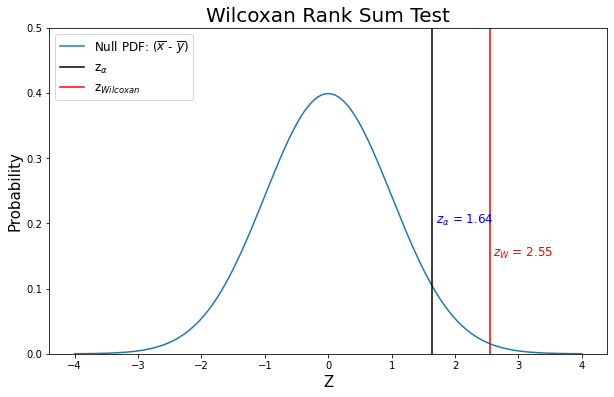

In [52]:
# Make a plot
plt.figure(figsize=(10,6))

# Create values for z
z = np.linspace(-4, 4, num=160)

# Plot the Null PDF
plt.plot(z, stats.norm.pdf(z), label='Null PDF: ($\overline{x}$ - $\overline{y}$)')

plt.axvline(z_alpha, color='black', label=r'z$_\alpha$')
# Add label here with alpha value
plt.text(z_alpha+0.05, 0.2, r'$z_{\alpha}$ = ' + str(round(z_alpha,2)),fontsize=12, color='b')

# Plot where z_test (from the Wilcoxan test)
plt.axvline(z_wilcoxan, color='red', label=r'z$_{Wilcoxan}$')
# Add label here with alpha value
plt.text(z_wilcoxan+0.05, 0.15, r'$z_{W}$ = ' + str(round(z_wilcoxan,2)),fontsize=12, color='r')



# title, legend, and labels
plt.title('Wilcoxan Rank Sum Test',fontsize=20)
plt.xlabel('Z', fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.ylim(0, 0.5)
plt.legend(loc='upper left',fontsize=12);

The Wilcoxan Rank Sum Test shows P = 0.0108 (cell 40), whereas the value of P is equal to 0.005 in Homework 2 (Type I Error). The p-value for Wilcoxan Rank Sum Test is greater than the p-value for a Type I Error. This suggests we are more likely to generate a Type II Error. 

---
Part C: Chi Squared Test

In [42]:
# calculate the t-statistic
sd1 = sauk_before['peak value (cfs)'].std() # pretend this is the "true pop"
sd2 = sauk_after['peak value (cfs)'].std()
m = len(sauk_after['peak value (cfs)'])
t = (m-1)*sd2**2/sd1**2
print(t)

81.50337618228346


Test for an increase in standard deviation. First, look-up critical value in a chi-squared distribution table:

In [43]:
stats.chi2.ppf?

Signature: stats.chi2.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      /opt/conda/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [47]:
beta = 0.05
vals = stats.chi2.ppf(beta, m-1)
print(vals)

29.787477080861958


The value for t-test (81.50) is greater than the cut-off value from the chi-squared distribution. This suggests that with 95% confidence,a change has occurred. 


---
**Problem 2: Analyzing Ranksum and mannwhitneyu Functions**

Part A:
    
The Ranksums function is used to compare two continuously distributed samples. The function is incapable of identifying connections between x and y values. As a result, the ranksums test makes the assumption that there are zero ties between two samples. This function applies to the data in Figure 1.

The Mannwhitneyu function has an optional continuity correction function which means it assumes the data samples are independent of each other. The function is capable of identifying functions between x and y values, but does not default to it.


Part B:

For both functions, one must specify exactly what is being tested. The Ranksums function defaults to "two-sided" but there are other options available. If you want to apply a continuity correction to the mannwhitney function, this must be specified in the function as use_continuity.


Part C:

In [62]:
z_wilcoxan_new, p_wilcoxan_new = stats.ranksums(sauk_after['peak value (cfs)'], sauk_before['peak value (cfs)'],  alternative = 'two-sided') 

print("z from stats.ranksums: {}".format(np.round(z_wilcoxan_new,4)))
print("p from stats.ranksums: {}".format(np.round(stats.norm.ppf(p_wilcoxan_new),4)))

#Code source: Lab 2-2

z from stats.ranksums: 2.5485
p from stats.ranksums: -2.2967


NOTE: Unsure why the p value for Ranksums is displayed as -2.2967. The value should read 0.0054. This change occurred when I went through each cell to check my work before submitting the assignment.

In [92]:
n = len(sauk_after['peak value (cfs)'])
m = len(sauk_before['peak value (cfs)'])

# Calculate the Mann-Whitney U test statistics
res = stats.mannwhitneyu(sauk_after['peak value (cfs)'], sauk_before['peak value (cfs)'], method = 'exact', alternative = 'two-sided')
mann_u, p_mann_u = res[0], res[1]
w = mann_u + (n*(n+1)*0.5)
z_mann_u = (w + 0.5 -0.5 *n*(n+m+1))/(np.sqrt(n*m*(n+m+1)*(1/12))) # z_mann_u

print("test statistic from stats.mannwhitneyu: {}".format(np.round(z_mann_u,4)))
print("P from stats.mannwhitneyu: {}".format(np.round(p_mann_u,4)))

#  Above code was created/discovered with Maryam and Slack HW channel

test statistic from stats.mannwhitneyu: 2.5523
P from stats.mannwhitneyu: 0.0106


*Analysis*: The P from Ranksums is very close to the P from mannwhitney test. Considering the functionality of the Mannwhitneyu test, I would choose this as my preferred method. The Mannwhitneyu test has a continuity correction function while Ranksums does not. This function is necessary for calculating corrections for x and y ties and can be beneficial for data  being observed.